# My CNN 

## Dataset loading

In [2]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [4]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


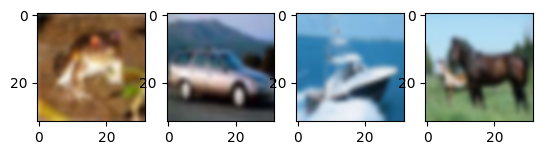

In [5]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Normalize (traning set 건드린 값으로, test set도 정규화)

120.70756512369792 64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.5247951877342226e-17 1.0000000000000022


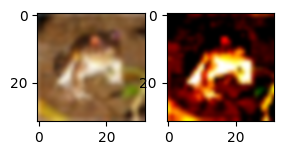

In [6]:
new_x_train = x_train
new_x_test = x_test

_mean = np.mean(x_train)
_std = np.std(x_train)
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print(_mean, _std)
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0][:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Traning

In [13]:


model = tf.keras.models.Sequential([
  # 1st
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  # 2nd
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  tf.keras.layers.Dropout(0.3),
  # 3rd
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),  
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#tf.keras.utils.plot_model(model, to_file='model02.png', show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 dropout_25 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 32)        18464     
                                                      

In [16]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=256, epochs=15, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)

Epoch 1/15
196/196 [==============================] - 5s 28ms/step - loss: 1.2386 - accuracy: 0.5548 - val_loss: 1.1699 - val_accuracy: 0.5972
Epoch 2/15
196/196 [==============================] - 5s 27ms/step - loss: 1.0418 - accuracy: 0.6295 - val_loss: 0.9980 - val_accuracy: 0.6665
Epoch 3/15
196/196 [==============================] - 5s 27ms/step - loss: 0.8999 - accuracy: 0.6790 - val_loss: 0.8784 - val_accuracy: 0.7113
Epoch 4/15
196/196 [==============================] - 5s 27ms/step - loss: 0.8087 - accuracy: 0.7139 - val_loss: 0.7994 - val_accuracy: 0.7307
Epoch 5/15
196/196 [==============================] - 5s 27ms/step - loss: 0.7269 - accuracy: 0.7420 - val_loss: 0.7546 - val_accuracy: 0.7506
Epoch 6/15
196/196 [==============================] - 5s 27ms/step - loss: 0.6648 - accuracy: 0.7648 - val_loss: 0.7419 - val_accuracy: 0.7422
Epoch 7/15
196/196 [==============================] - 5s 27ms/step - loss: 0.6167 - accuracy: 0.7819 - val_loss: 0.7015 - val_accuracy: 0.7584

[0.664532482624054, 0.7784000039100647]

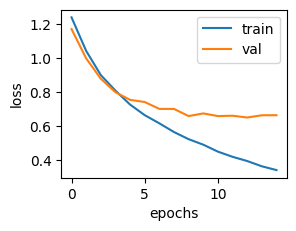

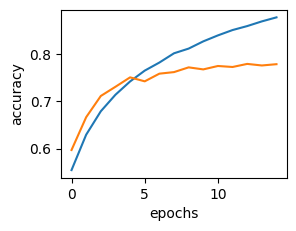

In [17]:
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model.save("_mymodel01")